In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
fuel_econ = pd.read_csv('./fuel-econ.csv')
fuel_econ.head(6)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0, 0.5, 'Avg, CFE')

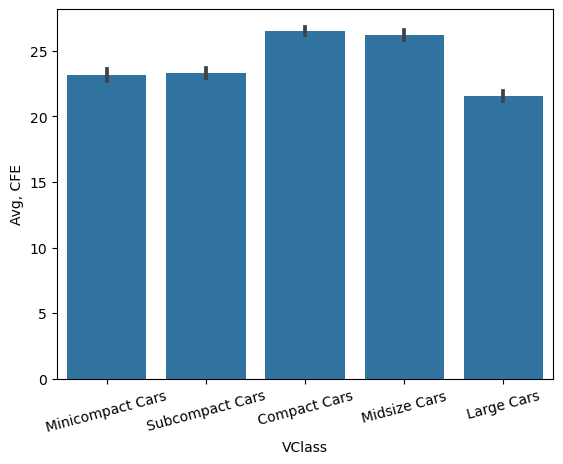

In [7]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg, CFE')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

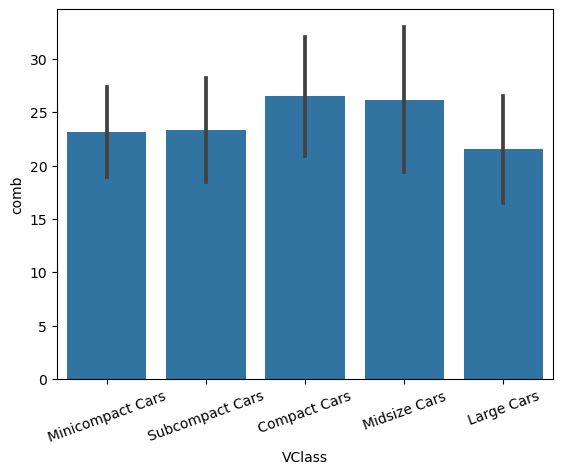

In [12]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd')
plt.xticks(rotation=20)

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

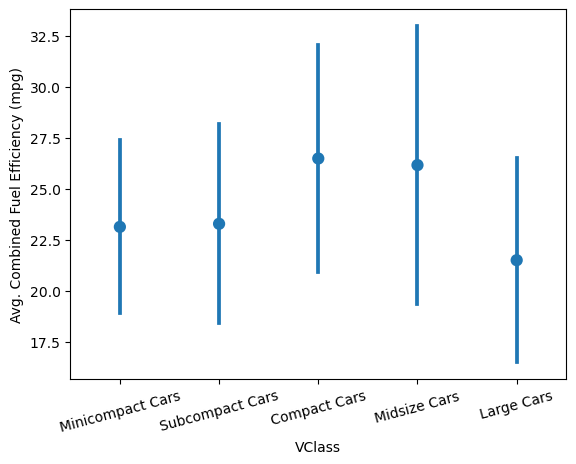

In [18]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

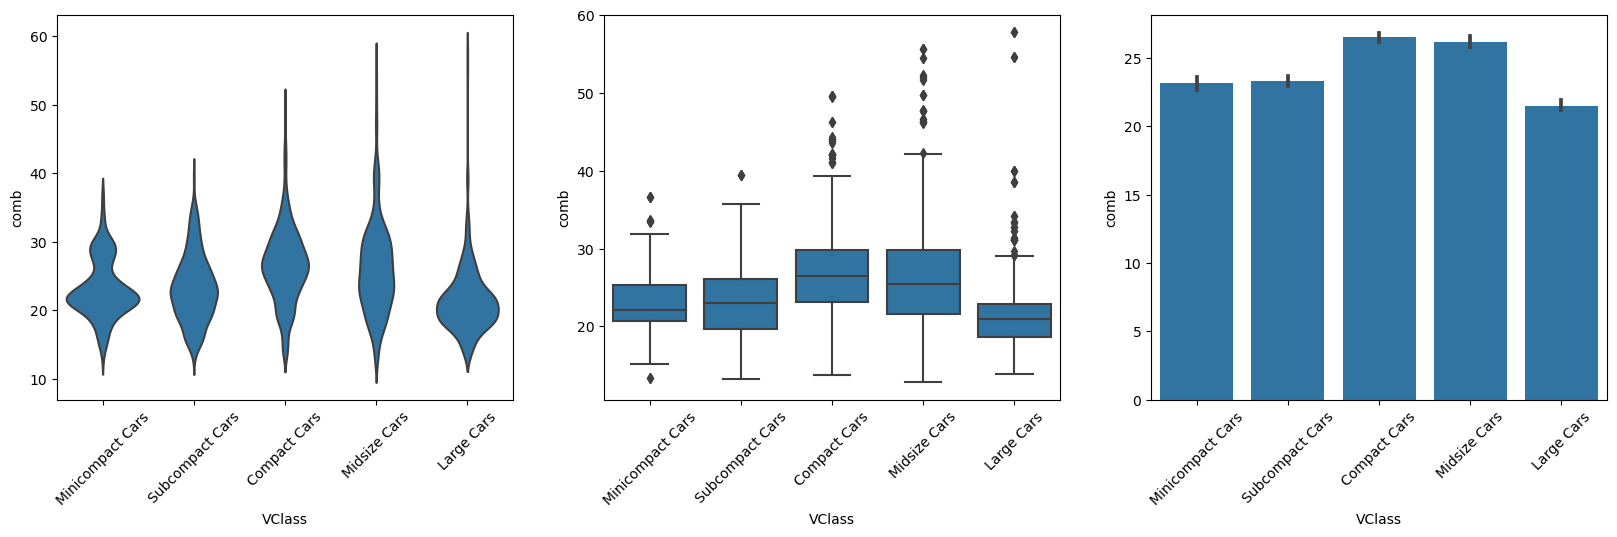

In [19]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner= None, color=base_color)
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sb.boxplot(data=fuel_econ,x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)


plt.subplot(1,3,3)
sb.barplot(data=fuel_econ,x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)


Text(0, 0.5, 'Avg. ')

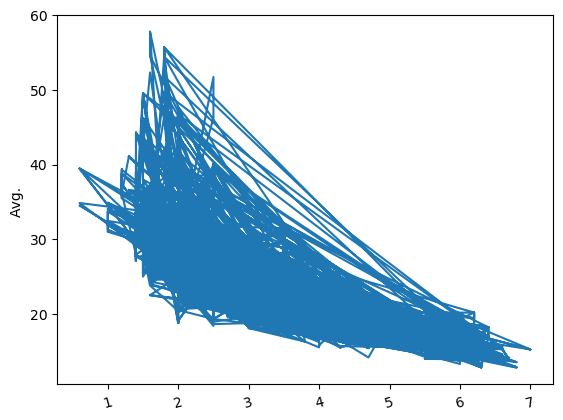

In [20]:
plt.errorbar(data=fuel_econ,x='displ', y='comb')
plt.xticks(rotation=15)
plt.ylabel('Avg. ')

In [26]:
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1]+0.1

displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

Text(0, 0.5, 'Avg')

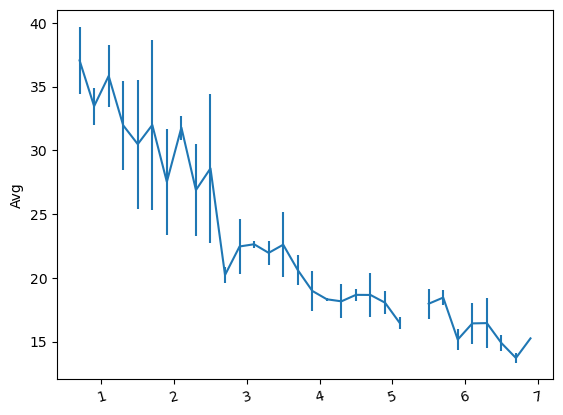

In [27]:
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15)
plt.ylabel('Avg')

In [30]:
df = pd.DataFrame(displ_binned)
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

## plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

KeyError: 'num_var1'